<a href="https://colab.research.google.com/github/dimakpa/DL_Projects/blob/main/DataPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Задачи

Если разметили с шагом, то так и оставляем, если без шага, то берем список красных изображений и начинаем с шагом 4, начиная до какого-то % изображения и заканчивая каким-то изображением %

  1) маска видна, а узел нет
  2) если похожие, то идем с шагом

  Удалить снимки из тестовой выборки, те на которых тестил

  Разделить на тестовые выборки учитывая фио

##Задачи по пунктам
1. Разбить очищенную таблицу на тестовую и тренировочную выборки так, чтоб снимки с одинаковыми ФИО не разделялись

    -a) Удалим ссылку на диск

    -б) Оставим уникальные ФИО и составим из них таблицу

    -в) Разделим ФИО на тестовую и валидационную (листы)

    -г) Создадим таблицу тренировочной и тестовой (если ФИО есть в тестовой, добавляем в тестовую, если ФИО в тренировочной, добавляем в тренировучную)
    
    -д) Имеем две таблицы - тестовой и тренировочной выборки

    -е) Сделать таблицу "Красивой", такой, чтоб колонки были одинаковы


2. Разбить новую таблицу на тренировочную и валидационные выборки
    -а) Удалить 40 строк, которые используются в тесте

    -б) Привести к виду первой таблицы

    -в) Разделить на тренировочную и валидационную

3. Соединить тренировочные и валидационные выборки
    
    -а) pd.concat()

4. Написать обработчик тифа изображения и маски

    -а) Подаем на вход ссылка изображения, ссылка маски, тренировочную выборку, валидационную выборку, ссылка на папки с тренировочной выборкой и тестовой

    б) Смотрим на то, как размечена маска
      
      Если разметили с шагом, то так и оставляем, если без шага, то берем список красных изображений и начинаем с шагом 4, начиная до какого-то %     изображения и заканчивая каким-то изображением %

        1) маска видна, а узел нет

        2) если похожие, то идем с шагом
    
    -в) Обрабатываем тиф, нарезаем снимки

    -г) Проверяем какой выборке принадлежит tif, на основе этого сохраняем в определенную папку изображения

5. Составить x_path и y_path для тестовой и тренировочной

    а) x_path для тренировочной и валидационной

    б) y_path для тренировочной и валидационной

#ВАЖНЫЕ ЗАМЕЧАНИЯ НА СЧЕТ БД


* Для соблюдения соответствия "строка таблицы - снимки" лучше переходить по ссылкам на данные из самого excel (а не смотреть чисто на номера папок)
* TIRADS указан в двух местах - в названии файлов и во второй колонке.
Если есть их несоответствие, то такие снимки для классификации пока лучше не брать. Если класс TIRADS указан только во второй колонке, но не указан в названии файла, то брать. НУЖНО ПРОВЕРЯТЬ ДАННЫЕ
* Посмотреть баланс выборок
* Сначала делить на тестовую и бучающиеся выборки, а потом парсить .tif
* Изображения одних пациентов лучше помещать в одну выборку

# Почистим таблицу с ссылками на файлы от подозрительных

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from pathlib import Path

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.DataFrame(pd.read_excel("/content/drive/MyDrive/Colab Notebooks/MEPHI/ClassifUltrasound/DB_Ultrasound.xlsx"))

df.head()

,№,"Узел ЩЖ, TIRADS","Вероятность злокачественности, %",Unnamed: 3,Заметка,Аппарат УЗИ,ID US,Кодировка узла на изображении,Местоположение файлов,Наименование файла изображения поперечного среза ЩЖ,...,Unnamed: 49,Unnamed: 50,Морфология микроскопия,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58
0,NaN,NaN,NaN,Bethesda,NaN,NaN,NaN,NaN,NaN,NaN,...,"Эффект ""хвост кометы""",Гиперэхогенный объект (не кальцинат),Представление узла (инкапсулир. или неинкапсул...,Инвазия,Заключение,Заболевания ЩЖ,Доброкачественность,Злокачественность,Ссылка на лаб. рез-ты,Лимфоцитарный тиреоидит в окружающей ткани
1,1.0,4,6-17,4,NaN,GE Voluson E8,D04621-22-04-25-1,NaN,https://disk.yandex.ru/d/uE1RuZpE-cpEDQ,1_TIRADS5_cross,...,0,0,инкапсулированный,нет,фолликулярная аденома,1,0,0,https://disk.yandex.ru/d/VIlsmV0Hfgl4HA,NaN
2,2.0,3,2-4,NaN,правую долю не удаляли,GE Voluson E8,D04621-22-04-25-2,NaN,https://disk.yandex.ru/d/8O7pKNoJ8ETcDA,2_TIRADS3_cross,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,2,Стремится к 0,NaN,правую долю не удаляли,GE Voluson E8,D04621-22-04-25-2,NaN,https://disk.yandex.ru/d/kD5v8Pdr4Vsi1w,3_TIRADS2_cross,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,5,26-87,NaN,NaN,GE Voluson E8,D04621-22-04-25-2,NaN,https://disk.yandex.ru/d/zuyoXLM401Roow,4_TIRADS5_cross,...,0,0,неинкапсулированный,NaN,Папиллярный рак,0,0,1,https://disk.yandex.ru/d/u08CyrNahuaJow,NaN


In [ ]:
df.tail()

,№,"Узел ЩЖ, TIRADS","Вероятность злокачественности, %",Unnamed: 3,Заметка,Аппарат УЗИ,ID US,Кодировка узла на изображении,Местоположение файлов,Наименование файла изображения поперечного среза ЩЖ,...,Unnamed: 49,Unnamed: 50,Морфология микроскопия,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58
403,404.0,5,NaN,NaN,NaN,LogiqE,NaN,D1,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
404,405.0,5,NaN,NaN,NaN,LogiqE,NaN,D2,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
405,406.0,5,NaN,NaN,NaN,LogiqE,NaN,D1,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
406,407.0,5,NaN,NaN,NaN,LogiqE,NaN,D1,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
407,408.0,3,NaN,NaN,NaN,LogiqE,NaN,S1,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(408, 59)

Перевд фильтрацией почистим строки, у которых нет файлов и у которых не тирадса во втором столбце

In [ ]:
df = df.dropna(subset=['Местоположение файлов', 'Узел ЩЖ, TIRADS'])
df.shape

(294, 59)

Проверим чтоб в тирадсах были только числа 2 3 4 5

In [ ]:
df = df[df.apply(lambda x: True if (x['Узел ЩЖ, TIRADS']) == 2 else
                 (True if (x['Узел ЩЖ, TIRADS']) == 3 else
                 (True if (x['Узел ЩЖ, TIRADS']) == 4 else
                  (True if (x['Узел ЩЖ, TIRADS']) == 5 else
                 False ))) ,axis=1)]
df.shape

(293, 59)

Удалим строки, где название расположение не начинается с https

In [ ]:
df = df[df.apply(lambda x: True if (str(x['Местоположение файлов'])[:4]) == 'http' else False,axis=1)]

df.shape

(281, 59)

Все пустые название в файлах поменяем на типовое 0_TIRADS

In [ ]:
df['Наименование файла изображения поперечного среза ЩЖ'] = df['Наименование файла изображения поперечного среза ЩЖ'].fillna('0_TIRADS')

<ipython-input-10-edd7d95e5c48>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Наименование файла изображения поперечного среза ЩЖ'] = df['Наименование файла изображения поперечного среза ЩЖ'].fillna('0_TIRADS')


Проверим соответствие 2 колонки и тирадса в названии файла. Если есть тирадс-> сравниваем, если не равны удаляем, если нет тирадса -> оставляем

Вытащим тирадс из строки

In [ ]:
df['Наименование файла изображения поперечного среза ЩЖ'].to_string().split("_")[1]

'TIRADS5'

In [ ]:
type(len(df['Наименование файла изображения поперечного среза ЩЖ'].to_string().split("_")[1]))

int

In [ ]:
str(df['Узел ЩЖ, TIRADS'][12])

'5'

или длина равна 6, то есть тирадса нет в названии, или тирадс во второй колонке и в названии одинаковый

In [ ]:
df.head()

,№,"Узел ЩЖ, TIRADS","Вероятность злокачественности, %",Unnamed: 3,Заметка,Аппарат УЗИ,ID US,Кодировка узла на изображении,Местоположение файлов,Наименование файла изображения поперечного среза ЩЖ,...,Unnamed: 49,Unnamed: 50,Морфология микроскопия,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58
1,1.0,4,6-17,4,NaN,GE Voluson E8,D04621-22-04-25-1,NaN,https://disk.yandex.ru/d/uE1RuZpE-cpEDQ,1_TIRADS5_cross,...,0,0,инкапсулированный,нет,фолликулярная аденома,1,0,0,https://disk.yandex.ru/d/VIlsmV0Hfgl4HA,NaN
2,2.0,3,2-4,NaN,правую долю не удаляли,GE Voluson E8,D04621-22-04-25-2,NaN,https://disk.yandex.ru/d/8O7pKNoJ8ETcDA,2_TIRADS3_cross,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,2,Стремится к 0,NaN,правую долю не удаляли,GE Voluson E8,D04621-22-04-25-2,NaN,https://disk.yandex.ru/d/kD5v8Pdr4Vsi1w,3_TIRADS2_cross,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,5,26-87,NaN,NaN,GE Voluson E8,D04621-22-04-25-2,NaN,https://disk.yandex.ru/d/zuyoXLM401Roow,4_TIRADS5_cross,...,0,0,неинкапсулированный,NaN,Папиллярный рак,0,0,1,https://disk.yandex.ru/d/u08CyrNahuaJow,NaN
5,5.0,5,26-87,5,NaN,GE Voluson E8,D04621-22-04-25-3,NaN,https://disk.yandex.ru/d/AvvCMq8dlu9R8A,5_TIRADS5_cross,...,0,0,неинкапсулированный,в капсулу железы,папиллярный рак,0,0,1,https://disk.yandex.ru/d/GuRhZXFkEKFaXQ,0


In [ ]:
df_new = pd.DataFrame()
# df = df[df['Узел ЩЖ, TIRADS'] == int(df['Наименование файла изображения поперечного среза ЩЖ'].to_string().split("_")[1][6])]

# df_new = df[df.apply(lambda x: True if (x['Узел ЩЖ, TIRADS']) == x['Наименование файла изображения поперечного среза ЩЖ'].split("_")[1][6] else False,axis=1)]

df_new = df[df.apply(lambda x:
                     True if len(str(x['Наименование файла изображения поперечного среза ЩЖ']).split("_")[1]) == 6   else  # Если в имени нет числа, просто ТИРАДС
                     (True if x['Узел ЩЖ, TIRADS'] == int(x['Наименование файла изображения поперечного среза ЩЖ'].split("_")[1][6]) # Сравниваем тирадсы
                          else False)  ,axis=1)]

#Создадим новый столбец с нашим тирадсом из названия файла
# df['points'] = df['Наименование файла изображения поперечного среза ЩЖ'].apply(lambda x: 7 if x == np.NaN else ( 6 if len(str(x).split("_")[1]) == 6 else str(x).split("_")[1][6] ))
# Сравним новый столбец с основным и запишем в новый столбец
# df['compare'] = df['points'] == df['Узел ЩЖ, TIRADS']
# df[df['Наименование файла изображения поперечного среза ЩЖ'].apply( lambda x: print(x == None))]
df_new.shape

(272, 59)

In [ ]:
df_new2 = pd.DataFrame()
df_new2 = df_new[['Узел ЩЖ, TIRADS', 'Местоположение файлов', 'Наименование файла изображения поперечного среза ЩЖ', 'Наименование файла маски поперечного среза ЩЖ', 'Наименование файла изображения продольного среза ЩЖ', 'Наименование файла маски продольного среза ЩЖ', 'ФИО']]

In [ ]:
df_new2.head()

,"Узел ЩЖ, TIRADS",Местоположение файлов,Наименование файла изображения поперечного среза ЩЖ,Наименование файла маски поперечного среза ЩЖ,Наименование файла изображения продольного среза ЩЖ,Наименование файла маски продольного среза ЩЖ,ФИО
2,3,https://disk.yandex.ru/d/8O7pKNoJ8ETcDA,2_TIRADS3_cross,2_TIRADS3_cross_mask,2_TIRADS3_long,2_TIRADS3_long_mask,Будыкин Владимир Борисович
3,2,https://disk.yandex.ru/d/kD5v8Pdr4Vsi1w,3_TIRADS2_cross,3_TIRADS2_cross_mask,3_TIRADS2_long,3_TIRADS2_long_mask,Будыкин Владимир Борисович
4,5,https://disk.yandex.ru/d/zuyoXLM401Roow,4_TIRADS5_cross,4_TIRADS5_cross_mask,4_TIRADS5_long,4_TIRADS5_long_mask,Будыкин Владимир Борисович
5,5,https://disk.yandex.ru/d/AvvCMq8dlu9R8A,5_TIRADS5_cross,5_TIRADS5_cross_mask,5_TIRADS5_long,5_TIRADS5_long_mask,Кузнецов Николай Алексеевич
6,5,https://disk.yandex.ru/d/CRfwJ5TrLw4aBA,6_TIRADS5_cross,6_TIRADS5_cross_mask,6_TIRADS5_long,6_TIRADS5_long_mask,Сураева Варвара Васильевна


In [ ]:
df_new.loc[2]['Наименование файла изображения поперечного среза ЩЖ']

'2_TIRADS3_cross'

In [ ]:

df_new2 = df_new2.drop(['Местоположение файлов'], axis=1)

In [ ]:
df_new2.head()

,"Узел ЩЖ, TIRADS",Наименование файла изображения поперечного среза ЩЖ,Наименование файла маски поперечного среза ЩЖ,Наименование файла изображения продольного среза ЩЖ,Наименование файла маски продольного среза ЩЖ,ФИО
2,3,2_TIRADS3_cross,2_TIRADS3_cross_mask,2_TIRADS3_long,2_TIRADS3_long_mask,Будыкин Владимир Борисович
3,2,3_TIRADS2_cross,3_TIRADS2_cross_mask,3_TIRADS2_long,3_TIRADS2_long_mask,Будыкин Владимир Борисович
4,5,4_TIRADS5_cross,4_TIRADS5_cross_mask,4_TIRADS5_long,4_TIRADS5_long_mask,Будыкин Владимир Борисович
5,5,5_TIRADS5_cross,5_TIRADS5_cross_mask,5_TIRADS5_long,5_TIRADS5_long_mask,Кузнецов Николай Алексеевич
6,5,6_TIRADS5_cross,6_TIRADS5_cross_mask,6_TIRADS5_long,6_TIRADS5_long_mask,Сураева Варвара Васильевна


Сохраним для аналази глазками

In [ ]:
df_new2.to_excel("/content/drive/MyDrive/Colab Notebooks/MEPHI/ClassifUltrasound/DB_new_Ultrasound.xlsx")

# Проверка баланса классов

У нас будет 3 класса 2-3, 4, 5
* Посмотреть баланс тирадсов по таблице
* Посмотреть баланс имен по таблице
* Скачать данные с яндекса
* Разбить на подвыборки (Подумать как одного пациента засунуть в одну выборку так, чтоб выборки были сбалансированными)
* Распарсить tif-ы


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Узел ЩЖ, TIRADS', ylabel='count'>

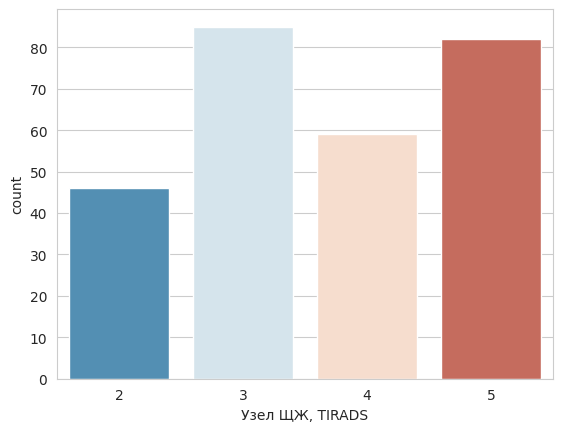

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Узел ЩЖ, TIRADS',data=df_new2,palette='RdBu_r')

Количество уникальных ФИО

In [ ]:
len(df_new2['ФИО'].unique())

144

<Axes: xlabel='ФИО', ylabel='count'>

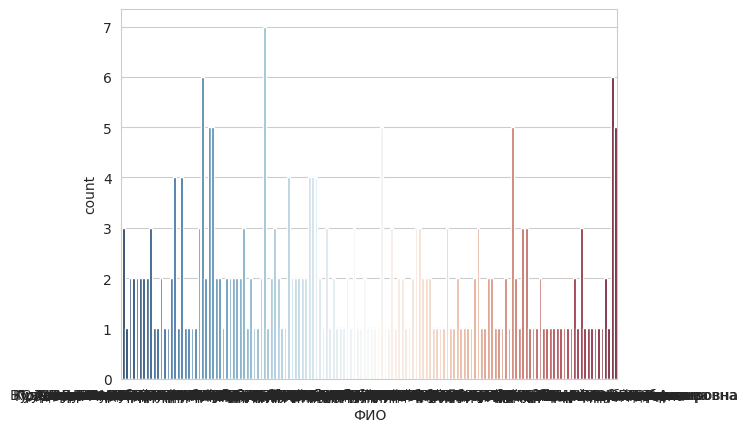

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='ФИО',data=df_new2,palette='RdBu_r')

<Axes: xlabel='Узел ЩЖ, TIRADS', ylabel='count'>

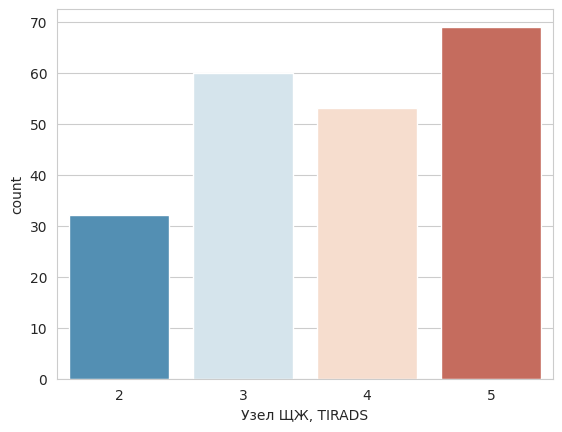

In [ ]:

df2 = df_new2.groupby('Узел ЩЖ, TIRADS', as_index=False)['ФИО'].value_counts(normalize=True)
sns.set_style('whitegrid')
sns.countplot(x='Узел ЩЖ, TIRADS',data=df2, palette='RdBu_r')

<Axes: xlabel='TIRADS', ylabel='count'>

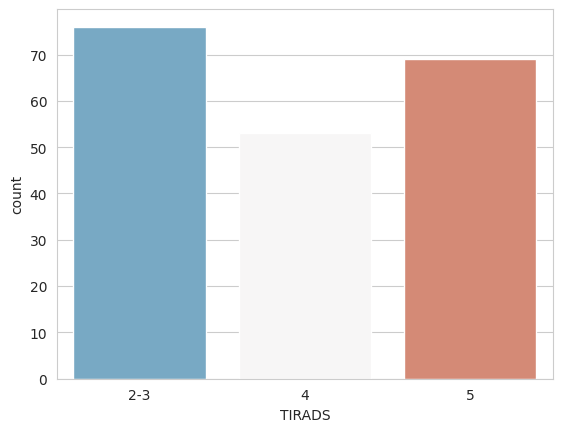

In [ ]:
# df.groupby('Узел ЩЖ, TIRADS')['ФИО'].value_counts(normalize=True).unstack().plot(kind='bar')

def f(row):
 if row['Узел ЩЖ, TIRADS'] == 2:
  val = '2-3'
 elif row['Узел ЩЖ, TIRADS'] == 3:
  val = '2-3'
 elif row['Узел ЩЖ, TIRADS'] == 4:
  val = '4'
 else :
  val = '5'
 return val

#create new column 'Good' using the function above
df_new2['TIRADS'] = df_new2.apply(f, axis=1)
df_new2.head()

df2 = df_new2.groupby('TIRADS', as_index=False)['ФИО'].value_counts(normalize=True)
sns.set_style('whitegrid')
sns.countplot(x='TIRADS',data=df2, palette='RdBu_r')

Классы сбалансированы, если подгружать по именам

#Теперь можно разбиавть на подвыборки

Переименуем колонки

In [ ]:
df_new2 = df_new2.rename(columns={"Узел ЩЖ, TIRADS": "Категория EU-TIRADS",
                                                "Наименование файла изображения поперечного среза ЩЖ": "Файл c ультразвуковым изображением поперечного среза щитовидной железы",
                                                "Наименование файла маски поперечного среза ЩЖ": "Файл с разметкой ультразвукового изображения поперечного среза щитовидной железы",
                                                "Наименование файла изображения продольного среза ЩЖ": "Файл c ультразвуковым изображением продольного среза щитовидной железы",
                                                "Наименование файла маски продольного среза ЩЖ": "Файл с разметкой ультразвукового изображения продольного среза щитовидной железы"
                                                })

Добавим столбец с названием и ссылкой на данные path

In [ ]:
df_new2['paths'] = df_new2['Файл c ультразвуковым изображением поперечного среза щитовидной железы'].apply( lambda x: x.split('_')[0] )
df_new2.head()

,Категория EU-TIRADS,Файл c ультразвуковым изображением поперечного среза щитовидной железы,Файл с разметкой ультразвукового изображения поперечного среза щитовидной железы,Файл c ультразвуковым изображением продольного среза щитовидной железы,Файл с разметкой ультразвукового изображения продольного среза щитовидной железы,ФИО,TIRADS,paths
2,3,2_TIRADS3_cross,2_TIRADS3_cross_mask,2_TIRADS3_long,2_TIRADS3_long_mask,Будыкин Владимир Борисович,2-3,2
3,2,3_TIRADS2_cross,3_TIRADS2_cross_mask,3_TIRADS2_long,3_TIRADS2_long_mask,Будыкин Владимир Борисович,2-3,3
4,5,4_TIRADS5_cross,4_TIRADS5_cross_mask,4_TIRADS5_long,4_TIRADS5_long_mask,Будыкин Владимир Борисович,5,4
5,5,5_TIRADS5_cross,5_TIRADS5_cross_mask,5_TIRADS5_long,5_TIRADS5_long_mask,Кузнецов Николай Алексеевич,5,5
6,5,6_TIRADS5_cross,6_TIRADS5_cross_mask,6_TIRADS5_long,6_TIRADS5_long_mask,Сураева Варвара Васильевна,5,6


Разделили DF по тирадсам

In [ ]:
three_df = df_new2[df_new2['TIRADS'] == '2-3']
four_df = df_new2[df_new2['TIRADS'] == '4']
five_df = df_new2[df_new2['TIRADS'] == '5']

five_df.head()

,Категория EU-TIRADS,Файл c ультразвуковым изображением поперечного среза щитовидной железы,Файл с разметкой ультразвукового изображения поперечного среза щитовидной железы,Файл c ультразвуковым изображением продольного среза щитовидной железы,Файл с разметкой ультразвукового изображения продольного среза щитовидной железы,ФИО,TIRADS,paths
4,5,4_TIRADS5_cross,4_TIRADS5_cross_mask,4_TIRADS5_long,4_TIRADS5_long_mask,Будыкин Владимир Борисович,5,4
5,5,5_TIRADS5_cross,5_TIRADS5_cross_mask,5_TIRADS5_long,5_TIRADS5_long_mask,Кузнецов Николай Алексеевич,5,5
6,5,6_TIRADS5_cross,6_TIRADS5_cross_mask,6_TIRADS5_long,6_TIRADS5_long_mask,Сураева Варвара Васильевна,5,6
10,5,10_TIRADS5_cross,10_TIRADS5_cross_mask,10_TIRADS5_long,10_TIRADS5_long_mask,Поздеева Анастасия Николаевна,5,10
11,5,11_TIRADS5_cross,11_TIRADS5_cross_mask,11_TIRADS5_long,11_TIRADS5_long_mask,Поздеева Анастасия Николаевна,5,11


Взяли уникальные фамилии из каждого DF

In [ ]:
three_list = three_df['ФИО'].unique()
four_list = four_df['ФИО'].unique()
five_list = five_df['ФИО'].unique()
five_list

array(['Будыкин Владимир Борисович', 'Кузнецов Николай Алексеевич',
       'Сураева Варвара Васильевна', 'Поздеева Анастасия Николаевна',
       'Снопова Ольга Николаевна', 'Такулова Ольга Геннадьевна',
       'Чагаева Раиса Баудиновна', 'Варакина Екатерина Петровна',
       'Мысниченко Евгения Александровна', 'Богач Ирина Викторовна',
       'Коняева Надежда Викторовна', 'Настина Елена Владимировна',
       'Смирнов Станислав Леонидович', 'Филина Ирина Анатольевна',
       'Рыжанская Оксана Владимировна',
       'Ловинская Вероника Александровна', 'Сафронова Татьяна Ивановна',
       'Кужельная Елена Владимировна', 'Немцова Светлана Владимировна',
       'Лизунова Е.А.', 'Сафронова Нина Степановна',
       'Салова Светлана Васильевна', 'Казиева Умукусум Джанмурзаевна',
       'Сазонова Ольга Владимировна', 'Савкин Василий Федорович',
       'Алиева Исмира Джафаровна', 'Дмитревская Надежда Владимировна',
       'Ильичева Татьяна Ивановна', 'Марченко Сергей Сергеевич',
       'Шомахова 

Разбиваем уникальные ФИО н авыборки

In [ ]:
from sklearn.model_selection import train_test_split

train_three_list, val_three_list = train_test_split(three_list, test_size=0.2)
train_four_list, val_four_list = train_test_split(four_list, test_size=0.2)
train_five_list, val_five_list = train_test_split(five_list, test_size=0.2)
val_five_list

array(['Веремеевская Марина Михайловна', 'Богач Ирина Викторовна',
       'Мичковский С.А.', 'Гейдарова Сакина Интагиш кызы',
       'Закриева Мадина Асламбековна', 'Переверзева А.А.',
       'Марченко Сергей Сергеевич', 'Сорокина Светлана Прокофьевна',
       'Середнева Анастасия Викторовна', 'Такулова Ольга Геннадьевна',
       'Ризаханова Мехрибан Загирбековна', 'Корогодова А.О.',
       'Батюкова Валентина Геннадьевна', 'Антонова Аревик Арутюновна'],
      dtype=object)

Создадим новую колонку 'train_val', где если train - 1, если val - 0

In [ ]:
three_df['train_val'] = three_df['ФИО'].apply( lambda x:  '1' if  x in train_three_list else '0')
four_df['train_val'] = four_df['ФИО'].apply( lambda x:  '1' if  x in train_four_list else '0')
five_df['train_val'] = five_df['ФИО'].apply( lambda x:  '1' if  x in train_five_list else '0')
five_df.head()

<ipython-input-33-f28cd3f69853>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  three_df['train_val'] = three_df['ФИО'].apply( lambda x:  '1' if  x in train_three_list else '0')
<ipython-input-33-f28cd3f69853>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  four_df['train_val'] = four_df['ФИО'].apply( lambda x:  '1' if  x in train_four_list else '0')
<ipython-input-33-f28cd3f69853>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

,Категория EU-TIRADS,Файл c ультразвуковым изображением поперечного среза щитовидной железы,Файл с разметкой ультразвукового изображения поперечного среза щитовидной железы,Файл c ультразвуковым изображением продольного среза щитовидной железы,Файл с разметкой ультразвукового изображения продольного среза щитовидной железы,ФИО,TIRADS,paths,train_val
4,5,4_TIRADS5_cross,4_TIRADS5_cross_mask,4_TIRADS5_long,4_TIRADS5_long_mask,Будыкин Владимир Борисович,5,4,1
5,5,5_TIRADS5_cross,5_TIRADS5_cross_mask,5_TIRADS5_long,5_TIRADS5_long_mask,Кузнецов Николай Алексеевич,5,5,1
6,5,6_TIRADS5_cross,6_TIRADS5_cross_mask,6_TIRADS5_long,6_TIRADS5_long_mask,Сураева Варвара Васильевна,5,6,1
10,5,10_TIRADS5_cross,10_TIRADS5_cross_mask,10_TIRADS5_long,10_TIRADS5_long_mask,Поздеева Анастасия Николаевна,5,10,1
11,5,11_TIRADS5_cross,11_TIRADS5_cross_mask,11_TIRADS5_long,11_TIRADS5_long_mask,Поздеева Анастасия Николаевна,5,11,1


Проверим балансировку

<Axes: xlabel='train_val', ylabel='count'>

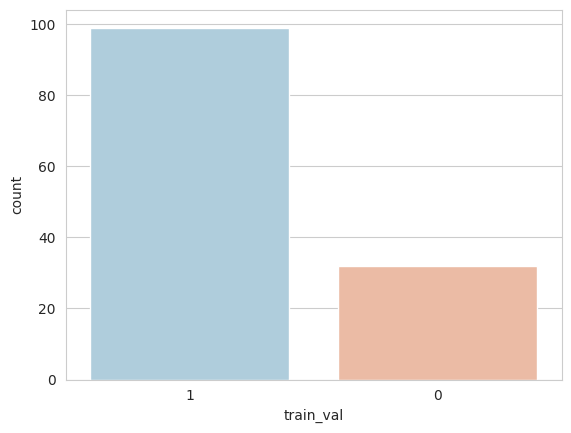

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='train_val',data=three_df,palette='RdBu_r')

<Axes: xlabel='train_val', ylabel='count'>

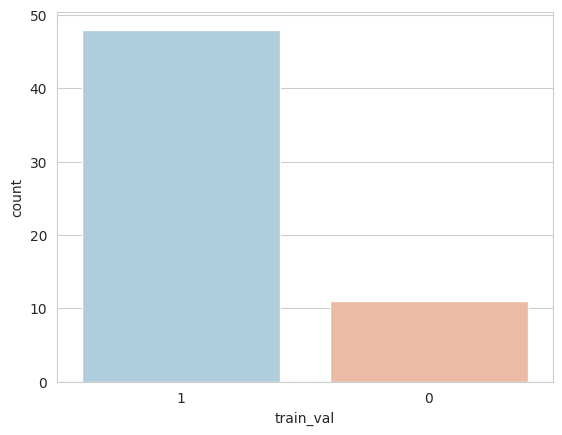

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='train_val',data=four_df,palette='RdBu_r')

<Axes: xlabel='train_val', ylabel='count'>

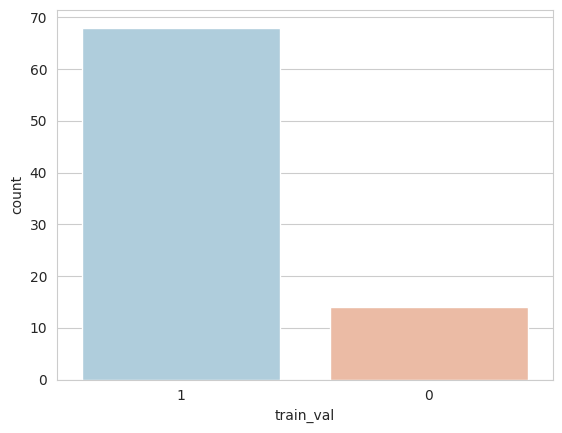

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='train_val',data=five_df,palette='RdBu_r')

Баланс при делении по фамилиям прекрасен

теперь разделим уже на таблицы трэйн и вал по условию столбца

In [ ]:
train_three_df1 = three_df.loc[three_df['train_val'] == '1']
train_three_df1 = train_three_df1.drop(['train_val', 'ФИО', 'TIRADS'], axis = 1)
val_three_df1 = three_df.loc[three_df['train_val'] == '0']
val_three_df1 = val_three_df1.drop(['train_val', 'ФИО', 'TIRADS'], axis = 1)

train_four_df1 = four_df.loc[four_df['train_val'] == '1']
train_four_df1 = train_four_df1.drop(['train_val', 'ФИО', 'TIRADS'], axis = 1)
val_four_df1 = four_df.loc[four_df['train_val'] == '0']
val_four_df1 = val_four_df1.drop(['train_val', 'ФИО', 'TIRADS'], axis = 1)

train_five_df1 = five_df.loc[five_df['train_val'] == '1']
train_five_df1 = train_five_df1.drop(['train_val', 'ФИО', 'TIRADS'], axis = 1)
val_five_df1 = five_df.loc[five_df['train_val'] == '0']
val_five_df1 = val_five_df1.drop(['train_val', 'ФИО', 'TIRADS'], axis = 1)

val_three_df1.head()

,Категория EU-TIRADS,Файл c ультразвуковым изображением поперечного среза щитовидной железы,Файл с разметкой ультразвукового изображения поперечного среза щитовидной железы,Файл c ультразвуковым изображением продольного среза щитовидной железы,Файл с разметкой ультразвукового изображения продольного среза щитовидной железы,paths
14,2,14_TIRADS2_cross,14_TIRADS2_cross_mask,NaN,NaN,14
39,3,39_TIRADS3_cross,39_TIRADS3_cross_mask,NaN,NaN,39
40,3,40_TIRADS3_cross,40_TIRADS3_cross_mask,NaN,NaN,40
42,2,42_TIRADS2_cross,42_TIRADS2_cross_mask,NaN,NaN,42
86,3,86_TIRADS3_cross,86_TIRADS3_cross_mask,86_TIRADS3_long,86_TIRADS3_long_mask,86


In [ ]:
val_five_df1.shape

(14, 6)

In [ ]:
s = "text text : one two three"
print(s.split(':')[0])

text text 


#Добавить вторую таблицу новых данных


* Подгрузить вторую таблицу
* Создать колонку с ссылкой к каждому файлу
* Удалить последние две колонки
* Соединить таблицы
* Провести исследования данных, балансировку

Подгрузим таблицу, из которой удалены 40 строк  

40 кинопетель (5 кинопетель cross 2 tirads, 5 кинопетель cross 3 tirads, ... 5 кинопетель cross 5 tirads, 5 кинопетель long 2 tirads, 5 кинопетель long 3 tirads, ..., 5 кинопетель long 5 tirads)

In [ ]:
df = pd.DataFrame(pd.read_excel("/content/drive/MyDrive/Colab Notebooks/MEPHI/ClassifUltrasound/Структура базы данных ультразвуковых изображений узловых образований щитовидной железы.xlsx"))
df.head()

,ID пациента,Категория EU-TIRADS,Файл c ультразвуковым изображением поперечного среза щитовидной железы,Файл с разметкой ультразвукового изображения поперечного среза щитовидной железы,Файл c ультразвуковым изображением продольного среза щитовидной железы,Файл с разметкой ультразвукового изображения продольного среза щитовидной железы,Размер ультразвукового изображения по оси Y,Размер ультразвукового изображения по оси X
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,study_000,5.0,study_000_TIRADS5_cross,study_000_TIRADS5_cross_mask,study_000_TIRADS5_long,study_000_TIRADS5_long_mask,661.0,975.0
2,study_005,5.0,study_005_TIRADS5_cross,study_005_TIRADS5_cross_mask,study_005_TIRADS5_long,study_005_TIRADS5_long_mask,661.0,975.0
3,study_006,3.0,study_006_TIRADS3_cross,study_006_TIRADS3_cross_mask,study_006_TIRADS3_long,study_006_TIRADS3_long_mask,661.0,975.0
4,study_008,4.0,study_008_TIRADS4_cross,study_008_TIRADS4_cross_mask,study_008_TIRADS4_long,study_008_TIRADS4_long_mask,661.0,975.0


Изменим название ID Пациента на paths


In [ ]:
df = df.rename(columns={"ID пациента":"paths"})
df.head()

,paths,Категория EU-TIRADS,Файл c ультразвуковым изображением поперечного среза щитовидной железы,Файл с разметкой ультразвукового изображения поперечного среза щитовидной железы,Файл c ультразвуковым изображением продольного среза щитовидной железы,Файл с разметкой ультразвукового изображения продольного среза щитовидной железы,Размер ультразвукового изображения по оси Y,Размер ультразвукового изображения по оси X
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,study_000,5.0,study_000_TIRADS5_cross,study_000_TIRADS5_cross_mask,study_000_TIRADS5_long,study_000_TIRADS5_long_mask,661.0,975.0
2,study_005,5.0,study_005_TIRADS5_cross,study_005_TIRADS5_cross_mask,study_005_TIRADS5_long,study_005_TIRADS5_long_mask,661.0,975.0
3,study_006,3.0,study_006_TIRADS3_cross,study_006_TIRADS3_cross_mask,study_006_TIRADS3_long,study_006_TIRADS3_long_mask,661.0,975.0
4,study_008,4.0,study_008_TIRADS4_cross,study_008_TIRADS4_cross_mask,study_008_TIRADS4_long,study_008_TIRADS4_long_mask,661.0,975.0


In [ ]:
df.shape

(218, 8)

Удалим две последние колонки, поменяем второй столбец на инт, удалим первый столбец

In [ ]:
df = df.dropna(how='all')
df = df.drop(['Размер ультразвукового изображения по оси Y', 'Размер ультразвукового изображения по оси X'], axis=1)

# df['Категория EU-TIRADS'] = df['Категория EU-TIRADS'].astype(str).astype(int)
df['Категория EU-TIRADS'] = pd.to_numeric(df['Категория EU-TIRADS'], errors='coerce').convert_dtypes()
df.head()

,paths,Категория EU-TIRADS,Файл c ультразвуковым изображением поперечного среза щитовидной железы,Файл с разметкой ультразвукового изображения поперечного среза щитовидной железы,Файл c ультразвуковым изображением продольного среза щитовидной железы,Файл с разметкой ультразвукового изображения продольного среза щитовидной железы
1,study_000,5,study_000_TIRADS5_cross,study_000_TIRADS5_cross_mask,study_000_TIRADS5_long,study_000_TIRADS5_long_mask
2,study_005,5,study_005_TIRADS5_cross,study_005_TIRADS5_cross_mask,study_005_TIRADS5_long,study_005_TIRADS5_long_mask
3,study_006,3,study_006_TIRADS3_cross,study_006_TIRADS3_cross_mask,study_006_TIRADS3_long,study_006_TIRADS3_long_mask
4,study_008,4,study_008_TIRADS4_cross,study_008_TIRADS4_cross_mask,study_008_TIRADS4_long,study_008_TIRADS4_long_mask
5,study_010,5,study_010_TIRADS5_cross,study_010_TIRADS5_cross_mask,study_010_TIRADS5_long,study_010_TIRADS5_long_mask


было 266. 40 строк удалили на тестовую + удалил повторяющиеся + удалил данные, которые отправлены на перепроверку

In [ ]:
df.shape

(217, 6)

Разделим на трэйн и валид

In [ ]:
three_df2 = df[(df['Категория EU-TIRADS'] == 2) | (df['Категория EU-TIRADS'] == 3)]
four_df2 = df[df['Категория EU-TIRADS'] == 4 ]
five_df2 = df[df['Категория EU-TIRADS'] == 5 ]

three_df2.head()

,paths,Категория EU-TIRADS,Файл c ультразвуковым изображением поперечного среза щитовидной железы,Файл с разметкой ультразвукового изображения поперечного среза щитовидной железы,Файл c ультразвуковым изображением продольного среза щитовидной железы,Файл с разметкой ультразвукового изображения продольного среза щитовидной железы
3,study_006,3,study_006_TIRADS3_cross,study_006_TIRADS3_cross_mask,study_006_TIRADS3_long,study_006_TIRADS3_long_mask
7,study_013,2,study_013_TIRADS2_cross,study_013_TIRADS2_cross_mask,NaN,NaN
9,study_015,3,study_015_TIRADS3_cross,study_015_TIRADS3_cross_mask,study_015_TIRADS3_long,study_015_TIRADS3_long_mask
10,study_016,3,study_016_TIRADS3_cross,study_016_TIRADS3_cross_mask,study_016_TIRADS3_long,study_016_TIRADS3_long_mask
12,study_034,3,study_034_TIRADS3_cross,study_034_TIRADS3_cross_mask,NaN,NaN


In [ ]:
train_three_df2, val_three_df2 = train_test_split(three_df2, test_size=0.2)
train_four_df2, val_four_df2 = train_test_split(four_df2, test_size=0.2)
train_five_df2, val_five_df2 = train_test_split(five_df2, test_size=0.2)
train_five_df2.head()

,paths,Категория EU-TIRADS,Файл c ультразвуковым изображением поперечного среза щитовидной железы,Файл с разметкой ультразвукового изображения поперечного среза щитовидной железы,Файл c ультразвуковым изображением продольного среза щитовидной железы,Файл с разметкой ультразвукового изображения продольного среза щитовидной железы
191,study_238,5,study_238_TIRADS5_cross,study_238_TIRADS5_cross_mask,study_238_TIRADS5_long,study_238_TIRADS5_long_mask
122,study_164,5,study_164_TIRADS5_cross,study_164_TIRADS5_cross_mask,study_164_TIRADS5_long,study_164_TIRADS5_long_mask
86,study_127,5,study_127_TIRADS5_cross,study_127_TIRADS5_cross_mask,NaN,NaN
154,study_177,5,study_177_TIRADS5_cross,study_177_TIRADS5_cross_mask,study_177_TIRADS5_long,study_177_TIRADS5_long_mask
109,study_151,5,study_151_TIRADS5_cross,study_151_TIRADS5_cross_mask,study_151_TIRADS5_long,study_151_TIRADS5_long_mask


Теперь для полного переобучения модели можно соединить df первой таблицы и второй

In [ ]:
train_five_df1.shape

(68, 6)

In [ ]:
train_five_df2.shape

(68, 6)

In [ ]:
train_three_df = pd.concat([
    train_three_df1,
    train_three_df2
], ignore_index=True)
train_three_df.fillna("nan",inplace=True)

val_three_df = pd.concat([
    val_three_df1,
    val_three_df2
], ignore_index=True)
val_three_df.fillna("nan",inplace=True)

train_four_df = pd.concat([
    train_four_df1,
    train_four_df2
], ignore_index=True)
train_four_df.fillna("nan",inplace=True)

val_four_df = pd.concat([
    val_four_df1,
    val_four_df2
], ignore_index=True)
val_four_df.fillna("nan",inplace=True)

train_five_df = pd.concat([
    train_five_df1,
    train_five_df2
], ignore_index=True)
train_five_df.fillna("nan",inplace=True)

val_five_df = pd.concat([
    val_five_df1,
    val_five_df2
], ignore_index=True)
val_five_df.fillna("nan",inplace=True)

In [ ]:
train_five_df.shape

(136, 6)

In [ ]:
train_five_df.head()

,Категория EU-TIRADS,Файл c ультразвуковым изображением поперечного среза щитовидной железы,Файл с разметкой ультразвукового изображения поперечного среза щитовидной железы,Файл c ультразвуковым изображением продольного среза щитовидной железы,Файл с разметкой ультразвукового изображения продольного среза щитовидной железы,paths
0,5,4_TIRADS5_cross,4_TIRADS5_cross_mask,4_TIRADS5_long,4_TIRADS5_long_mask,4
1,5,5_TIRADS5_cross,5_TIRADS5_cross_mask,5_TIRADS5_long,5_TIRADS5_long_mask,5
2,5,6_TIRADS5_cross,6_TIRADS5_cross_mask,6_TIRADS5_long,6_TIRADS5_long_mask,6
3,5,10_TIRADS5_cross,10_TIRADS5_cross_mask,10_TIRADS5_long,10_TIRADS5_long_mask,10
4,5,11_TIRADS5_cross,11_TIRADS5_cross_mask,11_TIRADS5_long,11_TIRADS5_long_mask,11


Соединим тренировочные и валидационные выборки, тк дальше присутствует деление

In [ ]:
val_df = pd.concat([
    val_five_df,
    val_four_df,
    val_three_df
], ignore_index=True)
val_df.fillna("nan",inplace=True)

train_df = pd.concat([
    train_five_df,
    train_four_df,
    train_three_df
], ignore_index=True)
train_df.fillna("nan",inplace=True)

In [ ]:
print(str(val_df.shape) + '  ' + str(train_df.shape))

(102, 6)  (387, 6)


In [ ]:
val_df = val_df.drop_duplicates()
train_df = train_df.drop_duplicates()

In [ ]:
print(str(val_df.shape) + '  ' + str(train_df.shape))

(102, 6)  (365, 6)


In [ ]:
val_df.loc[val_df['Файл c ультразвуковым изображением поперечного среза щитовидной железы'] == '0_TIRADS', 'Файл c ультразвуковым изображением поперечного среза щитовидной железы'] = 'nan'
train_df.loc[train_df['Файл c ультразвуковым изображением поперечного среза щитовидной железы'] == '0_TIRADS', 'Файл c ультразвуковым изображением поперечного среза щитовидной железы'] = 'nan'

In [ ]:
val_df.to_excel("/content/drive/MyDrive/Colab Notebooks/MEPHI/ClassifUltrasound/data/valid_df.xlsx")
train_df.to_excel("/content/drive/MyDrive/Colab Notebooks/MEPHI/ClassifUltrasound/data/train_df.xlsx")

#Напишем парсер тифов по маскам

1)Перед загрузкой тифа файл скачивается с яндекс диска

2)Сохраняется в нужную папку

3)Подгружается в load_tif

4)В функции load_tif происходит удаление прошлой папки и очистка корзины

Сначала напишем обработчик одного тифа с маской

Функция проходится по папке, смотрит все тифЫ, для которых имеется маска и запоминает их.

x_path = название самого тифа щитовидки

y_path = содержит  местоположение + название файла(маски), тирадс, название файла(маски)

считает количество каждого класса

In [ ]:
path1 = '/content/drive/MyDrive/Colab Notebooks/MEPHI/ClassifUltrasound/data/new_data/'

tif_long_classes = {2: 0, 3: 0, 4: 0, 5: 0}
tif_cross_classes = {2: 0, 3: 0, 4: 0, 5: 0}

from PIL import Image
import csv
from skimage.measure import regionprops
from skimage.transform import resize

In [ ]:
import os

In [ ]:
def get_pathes(path):
    # x_long_pathes = []
    # y_long_pathes = []
    x_pathes = []
    y_pathes = []
    for patient in os.listdir(path):
        # print(patient)
        for tif_name in os.listdir(path + patient + '/'):
            if 'mask' in tif_name:
                print(tif_name)
                # y_pathes.append([path + patient + '/' + tif_name, int(tif_name.split('_')[1][6]), tif_name]) #Тирадс считаю чуть по-другому
                # x_pathes.append(path + patient + '/' + tif_name.replace('_mask', ''))
                try:
                  N = int(tif_name.split('_')[1][6])
                except IndexError:
                  N = 5

                y_pathes.append([patient + '/' + tif_name, N, tif_name]) #Тирадс считаю чуть по-другому
                x_pathes.append(patient + '/' + tif_name.replace('_mask', ''))
    return x_pathes, y_pathes

Возможности считать пути по папкам нет, поэтому составим их имея df тренировочной и валидационной выборок

In [ ]:
def create_x_y_path_name(df):
  x_path_list = []
  y_path_list = []
  for index, row in df.iterrows():
    if row['Файл c ультразвуковым изображением поперечного среза щитовидной железы'] !='nan':
      item = []
      item.append(str(row['paths']) + '/' + row['Файл с разметкой ультразвукового изображения поперечного среза щитовидной железы'] + '.tif')
      item.append(int(row['Категория EU-TIRADS']))
      item.append(row['Файл с разметкой ультразвукового изображения поперечного среза щитовидной железы'] + '.tif')
      y_path_list.append(item)
      x_path_list.append(str(row['paths']) + '/' + row['Файл c ультразвуковым изображением поперечного среза щитовидной железы'] + '.tif')

  for index, row in df.iterrows():
    if row['Файл c ультразвуковым изображением продольного среза щитовидной железы'] !='nan':
      item = []
      item.append(str(row['paths']) + '/' + row['Файл с разметкой ультразвукового изображения продольного среза щитовидной железы'] + '.tif')
      item.append(int(row['Категория EU-TIRADS']))
      item.append(row['Файл с разметкой ультразвукового изображения продольного среза щитовидной железы'] + '.tif')
      y_path_list.append(item)
      x_path_list.append(str(row['paths']) + '/' + row['Файл c ультразвуковым изображением продольного среза щитовидной железы'] + '.tif')

  return x_path_list, y_path_list

In [ ]:
x_paths_train_five, y_paths_train_five = create_x_y_path_name(train_five_df)
x_paths_val_five, y_paths_val_five = create_x_y_path_name(val_five_df)
x_paths_train_four, y_paths_train_four = create_x_y_path_name(train_four_df)
x_paths_val_four, y_paths_val_four = create_x_y_path_name(val_four_df)
x_paths_train_three, y_paths_train_three = create_x_y_path_name(train_three_df)
x_paths_val_three, y_paths_val_three = create_x_y_path_name(val_three_df)

y_paths_train_five[10]

['38/38_TIRADS5_cross_mask.tif', 5, '38_TIRADS5_cross_mask.tif']

In [ ]:
x_paths_train_five[10]

'38/38_TIRADS5_cross.tif'

In [ ]:
x_paths_train, y_paths_train = create_x_y_path_name(train_df)
x_paths_val, y_paths_val = create_x_y_path_name(val_df)

In [ ]:
x_paths_val[10]

'197/197_TIRADS5_cross.tif'

Напишем функцию, которая загружает файл в папку tif  с яндекс диска

In [ ]:
import requests
from urllib.parse import urlencode, quote
import pandas as pd
import json

def load_file_from_yandex_disk(x_path, y_path):

  paths = [x_path, y_path[0]]

  for x in paths:
    base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
    public_key = []
    public_key1 = 'https://disk.yandex.ru/d/iFUq1wSg5BqeNA' # Сюда вписываете вашу ссылку
    public_key2 = 'https://disk.yandex.ru/d/zLfNFtgfdI7tyw'
    public_key.append(public_key1)
    public_key.append(public_key2)


    final_url = base_url + urlencode(dict(public_key=public_key[0 if x[0] == s else 1]))
    # response = requests.get(final_url)
    # download_url = response.json()['href']
    # download_response = requests.get(download_url)

    download_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download' + '?public_key=' + quote(public_key[0 if x[0] == s else 1]) + '&path=/' + quote(x if x[0] == 's' else 'SEGMENTED/' + x)

    print(download_url)
    # try:
    download_response = requests.get(download_url).json()['href']
    file_url = requests.get(download_response)
    with open('/content/drive/MyDrive/Colab Notebooks/MEPHI/ClassifUltrasound/data/ONE_FILE/' + x.split('/')[2 if x[0] == 'S' else 1], 'wb') as f:   # Здесь укажите нужный путь к файлу
        f.write(file_url.content)
    # except:
      # print('Не получилось загрузить с этой ссылки: ' + download_url)


Тест загрузчика

Собрать неразмеченные данные

In [ ]:
# load_file_from_yandex_disk(x_paths_train_five[5], y_paths_train_five[5])

Напишем функцию которая удаляет файл (после обработки, чтоб не засорять память) и удалять из корзины

In [ ]:
from google.colab import auth
from googleapiclient.discovery import build
def delete_file_from_path(x_path, y_path, path='/content/drive/MyDrive/Colab Notebooks/MEPHI/ClassifUltrasound/data/ONE_FILE/'):
  try:
    print(path + x_path)
    os.remove(path + x_path)
  except:
    print("Error while deleting file : ", path + x_path)
  try:
    print(path + y_path[0])
    os.remove(path + y_path[0])
    # os.remove(path + x_path.split('/')[0] + '/')
  except:
    print("Error while deleting file : ", path + y_path[0])

  # drive_service = build('drive', 'v3')
  # drive_service.files().emptyTrash().execute()


Удаление просто папки

In [ ]:
from google.colab import auth
from googleapiclient.discovery import build
def delete_folder(x_path, path='/content/drive/MyDrive/Colab Notebooks/MEPHI/ClassifUltrasound/data/ONE_FILE/'):
  dir = x_path.split('/')[0]

  # Path
  # location = '/content/drive/MyDrive/Colab Notebooks/MEPHI/ClassifUltrasound/data/'
  paths = os.path.join(path, dir)

  # os.remove(path)

  try:
    # print(path + x_path.split('/')[0])
    # os.rmdir(path + x_path.split('/')[0])
    os.rmdir(paths)

  except:
    print("Error while deleting folder : ", paths)

  # drive_service = build('drive', 'v3')
  # drive_service.files().emptyTrash().execute()


Тест удаления

In [ ]:
# delete_file_from_path(x_paths_train_five[5], y_paths_train_five[5])

Нужно переписать фуекцию, чтоб X_PATH и Y_PATH составлялись не при проходе по папкам, а при проходе по таблице данных

In [ ]:
# x_pathes, y_pathes = get_pathes(path1, tif_long_classes, tif_cross_classes)

In [ ]:
# x_pathes

In [ ]:
# y_pathes

In [ ]:
print(len(y_paths_train))
print(len(x_paths_val))


702
180


Загрузка тифа, возвращает массив масок и изображений

Исправить начало и конец шага по условию

In [ ]:
# def load_tif(x_path, y_path, step=4):
def load_tif(x_path, y_path, step=4):
    images = []
    masks = []
    image = Image.open('/content/drive/MyDrive/Colab Notebooks/MEPHI/ClassifUltrasound/data/ONE_FILE/' + x_path)
    mask = Image.open('/content/drive/MyDrive/Colab Notebooks/MEPHI/ClassifUltrasound/data/ONE_FILE/' + y_path[0])
    i = 0
    j = 0
    while True:
        try:
            mask.seek(i)
            mask_array = np.array(mask)
            image.seek(i)
            image_array = np.array(image)
            if len(np.unique(np.concatenate(mask_array, axis=0))) > 1: #Проверка, что маска не полностью черная
                if j % step == 0:
                    masks.append([mask_array, y_path[1], y_path[2]])
                    images.append(image_array)
                j += 1
            else:
                j = 0
            i += 1
        except EOFError:
            break
    return images, masks

Функция для поиска пустых масок и добавления path в csv

Непонятно как сделать автоматически

In [ ]:
def check_and_save_empty_masks(x_path, y_path):
    images = []
    masks = []
    image = Image.open('/content/drive/MyDrive/Colab Notebooks/MEPHI/ClassifUltrasound/data/ONE_FILE/' + x_path)
    mask = Image.open('/content/drive/MyDrive/Colab Notebooks/MEPHI/ClassifUltrasound/data/ONE_FILE/' + y_path[0])
    i = 0
    check = 0
    while True:
        try:
            mask.seek(i)
            mask_array = np.array(mask)
            # image.seek(i)
            # image_array = np.array(image)
            print(len(np.unique(np.concatenate(mask_array, axis=0))))
            if len(np.unique(np.concatenate(mask_array, axis=0))) == 1: #Проверка, что маска не полностью черная
                check += 1

            i += 1
        except EOFError:
            break
    print(str(check) + ' == ' + str(i))
    if check == i:
      with open('/content/drive/MyDrive/Colab Notebooks/MEPHI/ClassifUltrasound/data/empty_masks.csv', 'a', newline='') as file:
        csv_writer = csv.writer(file)
        # print(x_path)
        csv_writer.writerow([x_path, y_path[0]])


In [ ]:
# check_and_save_empty_masks('study_005/study_005_TIRADS5_cross.tif', ['study_005/study_005_TIRADS5_cross_mask.tif', 5, 'oisfdjg'])

Тест

In [ ]:
mask = Image.open('/content/drive/MyDrive/Colab Notebooks/MEPHI/ClassifUltrasound/data/367/367_TIRADS5_long_mask.tif')
mask.seek(18)
mask_array = np.array(mask)
# (np.concatenate(mask_array, axis=0))
np.unique(np.concatenate(mask_array, axis=0))

array([0], dtype=uint8)

In [ ]:
x_paths_train_five[0]

'4/4_TIRADS5_cross.tif'

In [ ]:
type(y_paths_train_five[5][1])

int

Проверка работы Load_tif с яндекс диском

In [ ]:
# images, mask = load_tif(x_paths_train_five[0], y_paths_train_five[0])

Функция получает изображения после подгружения тифов

In [ ]:
def get_images(x_pathes, y_pathes, path='/content/drive/MyDrive/Colab Notebooks/MEPHI/ClassifUltrasound/data/ONE_FILE/'):

    images = []
    masks = []
    for x_path, y_path in zip(x_pathes, y_pathes):
        if y_path[1] != 0:
          # Загрузчик файла
          new_images, new_masks = load_tif(x_path, y_path)
          images += new_images
          masks += new_masks

    return images, masks

для теста

In [ ]:
x_for_test = []
y_for_test = []

x_for_test.append(x_paths_train_five[0])
y_for_test.append(y_paths_train_five[0])

x_for_test.append(x_paths_train_five[1])
y_for_test.append(y_paths_train_five[1])

In [ ]:
# np.unique(masks[0][0])

In [ ]:
def preprocessing2(roi: object):
    if np.sum(roi) == 0:
        minr, minc, maxr, maxc = [0, 0, 256, 256]
    else:
        region = regionprops(roi)[0]
        minr, minc, maxr, maxc = region.bbox
    dim1_center, dim2_center = [(maxr + minr) // 2, (maxc + minc) // 2]
    max_length = max(maxr - minr, maxc - minc)
    max_lengthl = int((256 / 256) * 80)
    preprocess1 = int((256 / 256) * 19)
    pp22 = int((256 / 256) * 31)
    if max_length > max_lengthl:
        ex_pixel = preprocess1 + max_length // 2
    else:
        ex_pixel = pp22 + max_length // 2
    dim1_cut_min = dim1_center - ex_pixel
    dim1_cut_max = dim1_center + ex_pixel
    dim2_cut_min = dim2_center - ex_pixel
    dim2_cut_max = dim2_center + ex_pixel
    if dim1_cut_min < 0:
        dim1_cut_min = 0
    if dim2_cut_min < 0:
        dim2_cut_min = 0
    if dim1_cut_max > 256:
        dim1_cut_max = 256
    if dim2_cut_max > 256:
        dim2_cut_max = 256
    return [dim1_cut_min, dim1_cut_max, dim2_cut_min, dim2_cut_max]

In [ ]:
def save_pngs(folder_path, check_folder_path, images, masks, bias):
    tirads_list = []
    names_list = []
    j = 0
    for i in range(len(images)):
        cut_image = resize(images[i], (256, 256), order=3)
        cut_image = (cut_image * 255).astype(np.uint8)
        cut_mask = np.array(Image.fromarray(masks[i][0]).resize((256, 256)))
        dim1_cut_min, dim1_cut_max, dim2_cut_min, dim2_cut_max = preprocessing2(cut_mask)
        image_roi = cut_image[dim1_cut_min:dim1_cut_max, dim2_cut_min:dim2_cut_max]
        mask_roi = cut_mask[dim1_cut_min:dim1_cut_max, dim2_cut_min:dim2_cut_max]
        if masks[i][1] == 2 or masks[i][1] == 3:
            image_save_path = f'{folder_path}tirads2-3/{j + bias}.PNG'
            mask_save_path = f'{check_folder_path}tirads2-3/{j + bias}.PNG'
        elif masks[i][1] == 4:
            image_save_path = f'{folder_path}tirads4/{j + bias}.PNG'
            mask_save_path = f'{check_folder_path}tirads4/{j + bias}.PNG'
        elif masks[i][1] == 5:
            image_save_path = f'{folder_path}tirads5/{j + bias}.PNG'
            mask_save_path = f'{check_folder_path}tirads5/{j + bias}.PNG'
        if masks[i][1] != 0:
            Image.fromarray(image_roi).convert(mode='L').save(image_save_path) # 1-канальное изображение
            plt.imsave(mask_save_path, mask_roi, cmap=plt.cm.gray) # Маски 4-канальные
            tirads_list.append(masks[i][1])
            names_list.append(masks[i][2])
            j += 1
    return tirads_list, names_list

In [ ]:
# images_train_five, masks_train_five = get_images(x_paths_train_five, y_paths_train_five)
# images_val_five, masks_val_five = get_images(x_paths_val_five, y_paths_val_five)
# images_train_four, masks_train_four = get_images(x_paths_train_four, y_paths_train_four)
# images_val_four, masks_val_four = get_images(x_paths_val_four, y_paths_val_four)
# images_train_three, masks_train_three = get_images(x_paths_train_three, y_paths_train_three)
# images_val_three, masks_val_three = get_images(x_paths_val_three, y_paths_val_three)

In [ ]:
train_data_save_path = '/content/drive/MyDrive/Colab Notebooks/MEPHI/ClassifUltrasound/data/FINISH_DATA/train/'
train_check_data_save_path = '/content/drive/MyDrive/Colab Notebooks/MEPHI/ClassifUltrasound/data/FINISH_DATA/train/rois_masks/'

val_data_save_path = '/content/drive/MyDrive/Colab Notebooks/MEPHI/ClassifUltrasound/data/FINISH_DATA/valid/'
val_check_data_save_path = '/content/drive/MyDrive/Colab Notebooks/MEPHI/ClassifUltrasound/data/FINISH_DATA/valid/rois_masks/'

path_one_file = '/content/drive/MyDrive/Colab Notebooks/MEPHI/ClassifUltrasound/data/ONE_FILE/'

Логика такая:

1) Получаем ссылки файлов, которые есть и удаляем расположение, оставляя только 4/4_TIRADS5_cross.tif

2) итерирцемся по ссылкам и проверяем их наличие в одной из таблиц

3) если есть ссылка в валидационной, выполняем первое, если есть в тренировочной, выполняем второе, иначе просто пропускаем (печатаем название и уадляем самостоятельно)

Подгружаем ссылки новых снимков в файле

Функция для разделения ссылок

In [ ]:
def get_new_paths_for_one(x_paths, y_paths):
  x_train_paths = []
  x_valid_paths = []
  x_false_paths = []
  y_train_paths = []
  y_valid_paths = []
  y_false_paths = []
  for x_path, y_path in zip(x_paths, y_paths):
    if x_path in x_paths_train:
      x_train_paths.append(x_path)
      y_train_paths.append(y_path)
    elif x_path in x_paths_val:
      x_valid_paths.append(x_path)
      y_valid_paths.append(y_path)
    else:
      x_false_paths.append(x_path)
      y_false_paths.append(y_path)
      # delete_file(x_path)
  return x_train_paths, y_train_paths, x_valid_paths, y_valid_paths, x_false_paths, y_false_paths

In [ ]:
x_paths, y_paths = get_pathes(path_one_file)

159_TIRADS_long_mask.tif
159_TIRADS_cross_mask.tif
158_TIRADS5_cross_mask.tif
158_TIRADS5_long_mask.tif
16_TIRADS3_cross_mask.tif
16_TIRADS3_long_mask.tif
160_TIRADS_cross_mask.tif
160_TIRADS_long_mask.tif
161_TIRADS5_cross_mask.tif
161_TIRADS5_long_mask.tif
162_TIRADS4_cross_mask.tif
162_TIRADS4_long_mask.tif
155_TIRADS3_cross_mask.tif
164_TIRADS4_long_mask.tif
164_TIRADS4_cross_mask.tif
166_TIRADS4_cross_mask.tif
166_TIRADS4_long_mask.tif
167_TIRADS4_long_mask.tif
167_TIRADS4_cross_mask.tif
17_TIRADS3_cross_mask.tif
17_TIRADS3_long_mask.tif
172_TIRADS3_cross_mask.tif
172_TIRADS3_long_mask.tif
173_TIRADS5_long_mask.tif
173_TIRADS5_cross_mask.tif
175_TIRADS5_cross_mask.tif
175_TIRADS5_long_mask.tif
174_TIRADS5_long_mask_add.tif
174_TIRADS5_long_mask.tif
174_TIRADS5_cross_mask.tif
177_TIRADS5_cross_mask.tif
177_TIRADS5_long_mask.tif
179_TIRADS5_cross_mask.tif
179_TIRADS5_long_mask.tif
180_TIRADS3_long_mask.tif
180_TIRADS3_cross_mask.tif
181_TIRADS5_long_mask.tif
181_TIRADS5_cross_mask.t

Прогоняем все файлы и делим на тренировочную и тестовую те папки, которые подгружены

In [ ]:
x_train_paths, y_train_paths, x_valid_paths, y_valid_paths, x_false_paths, y_false_paths = get_new_paths_for_one(x_paths, y_paths)

for x_path, y_path in zip(x_false_paths, y_false_paths):
    with open('/content/drive/MyDrive/Colab Notebooks/MEPHI/ClassifUltrasound/data/empty_masks.csv', 'a', newline='') as file:
        csv_writer = csv.writer(file)
        # print(x_path)
        csv_writer.writerow([x_path, y_path[0]])

In [ ]:
x_train_paths

['159/159_TIRADS_long.tif',
 '159/159_TIRADS_cross.tif',
 '158/158_TIRADS5_cross.tif',
 '158/158_TIRADS5_long.tif',
 '16/16_TIRADS3_cross.tif',
 '16/16_TIRADS3_long.tif',
 '160/160_TIRADS_cross.tif',
 '160/160_TIRADS_long.tif',
 '161/161_TIRADS5_cross.tif',
 '161/161_TIRADS5_long.tif',
 '162/162_TIRADS4_cross.tif',
 '162/162_TIRADS4_long.tif',
 '155/155_TIRADS3_cross.tif',
 '164/164_TIRADS4_long.tif',
 '164/164_TIRADS4_cross.tif',
 '166/166_TIRADS4_cross.tif',
 '166/166_TIRADS4_long.tif',
 '167/167_TIRADS4_long.tif',
 '167/167_TIRADS4_cross.tif',
 '17/17_TIRADS3_cross.tif',
 '17/17_TIRADS3_long.tif',
 '172/172_TIRADS3_cross.tif',
 '172/172_TIRADS3_long.tif',
 '173/173_TIRADS5_long.tif',
 '175/175_TIRADS5_cross.tif',
 '175/175_TIRADS5_long.tif',
 '174/174_TIRADS5_long.tif',
 '174/174_TIRADS5_cross.tif',
 '177/177_TIRADS5_cross.tif',
 '177/177_TIRADS5_long.tif',
 '179/179_TIRADS5_cross.tif',
 '179/179_TIRADS5_long.tif',
 '180/180_TIRADS3_long.tif',
 '180/180_TIRADS3_cross.tif',
 '181/181

In [ ]:
y_train_paths

[['159/159_TIRADS_long_mask.tif', 5, '159_TIRADS_long_mask.tif'],
 ['159/159_TIRADS_cross_mask.tif', 5, '159_TIRADS_cross_mask.tif'],
 ['158/158_TIRADS5_cross_mask.tif', 5, '158_TIRADS5_cross_mask.tif'],
 ['158/158_TIRADS5_long_mask.tif', 5, '158_TIRADS5_long_mask.tif'],
 ['16/16_TIRADS3_cross_mask.tif', 3, '16_TIRADS3_cross_mask.tif'],
 ['16/16_TIRADS3_long_mask.tif', 3, '16_TIRADS3_long_mask.tif'],
 ['160/160_TIRADS_cross_mask.tif', 5, '160_TIRADS_cross_mask.tif'],
 ['160/160_TIRADS_long_mask.tif', 5, '160_TIRADS_long_mask.tif'],
 ['161/161_TIRADS5_cross_mask.tif', 5, '161_TIRADS5_cross_mask.tif'],
 ['161/161_TIRADS5_long_mask.tif', 5, '161_TIRADS5_long_mask.tif'],
 ['162/162_TIRADS4_cross_mask.tif', 4, '162_TIRADS4_cross_mask.tif'],
 ['162/162_TIRADS4_long_mask.tif', 4, '162_TIRADS4_long_mask.tif'],
 ['155/155_TIRADS3_cross_mask.tif', 3, '155_TIRADS3_cross_mask.tif'],
 ['164/164_TIRADS4_long_mask.tif', 4, '164_TIRADS4_long_mask.tif'],
 ['164/164_TIRADS4_cross_mask.tif', 4, '164_TIRA

In [ ]:
# images_train, masks_train = get_images(x_train_paths, y_train_paths)

In [ ]:
# tirads_list1, names_list1 = save_pngs(train_data_save_path, train_check_data_save_path, images_train, masks_train, bias=0)

Удаление всех файлов и папок

In [ ]:
from googleapiclient.discovery import build

In [ ]:
images_train, masks_train = get_images(x_train_paths, y_train_paths)
tirads_list1, names_list1 = save_pngs(train_data_save_path, train_check_data_save_path, images_train, masks_train, bias=1080)


images_val, masks_val = get_images(x_valid_paths, y_valid_paths)
tirads_list2, names_list2 = save_pngs(val_data_save_path, val_check_data_save_path, images_val, masks_val, bias=0)

for x_path, y_path in zip(x_train_paths, y_train_paths):
  delete_file_from_path(x_path, y_path)
for x_train_path in x_train_paths:
  delete_folder(x_train_path)

for x_path, y_path in zip(x_valid_paths, y_valid_paths):
  delete_file_from_path(x_path, y_path)
for x_train_path in x_valid_paths:
  delete_folder(x_train_path)

/content/drive/MyDrive/Colab Notebooks/MEPHI/ClassifUltrasound/data/ONE_FILE/159/159_TIRADS_long.tif
/content/drive/MyDrive/Colab Notebooks/MEPHI/ClassifUltrasound/data/ONE_FILE/159/159_TIRADS_long_mask.tif
/content/drive/MyDrive/Colab Notebooks/MEPHI/ClassifUltrasound/data/ONE_FILE/159/159_TIRADS_cross.tif
/content/drive/MyDrive/Colab Notebooks/MEPHI/ClassifUltrasound/data/ONE_FILE/159/159_TIRADS_cross_mask.tif
/content/drive/MyDrive/Colab Notebooks/MEPHI/ClassifUltrasound/data/ONE_FILE/158/158_TIRADS5_cross.tif
/content/drive/MyDrive/Colab Notebooks/MEPHI/ClassifUltrasound/data/ONE_FILE/158/158_TIRADS5_cross_mask.tif
/content/drive/MyDrive/Colab Notebooks/MEPHI/ClassifUltrasound/data/ONE_FILE/158/158_TIRADS5_long.tif
/content/drive/MyDrive/Colab Notebooks/MEPHI/ClassifUltrasound/data/ONE_FILE/158/158_TIRADS5_long_mask.tif
/content/drive/MyDrive/Colab Notebooks/MEPHI/ClassifUltrasound/data/ONE_FILE/16/16_TIRADS3_cross.tif
/content/drive/MyDrive/Colab Notebooks/MEPHI/ClassifUltrasound/

In [ ]:
for el in list(set(tirads_list1)):
    print(f'{el}: {tirads_list1.count(el)}')
for el in list(set(tirads_list2)):
    print(f'{el}: {tirads_list2.count(el)}')

In [ ]:
images_train_four, masks_train_four = get_images(x_paths_train_four, y_paths_train_four)
tirads_list1, names_list1 = save_pngs(train_data_save_path, train_check_data_save_path, images_train_four, masks_train_four, bias=0)
images_val_four, masks_val_four = get_images(x_paths_val_four, y_paths_val_four)
tirads_list2, names_list2 = save_pngs(val_data_save_path, val_check_data_save_path, images_val_four, masks_val_four, bias=0)

In [ ]:
for el in list(set(tirads_list1)):
    print(f'{el}: {tirads_list1.count(el)}')
for el in list(set(tirads_list2)):
    print(f'{el}: {tirads_list2.count(el)}')

In [ ]:
images_train_three, masks_train_three = get_images(x_paths_train_three, y_paths_train_three)
tirads_list1, names_list1 = save_pngs(train_data_save_path, train_check_data_save_path, images_train_three, masks_train_three, bias=0)
images_val_three, masks_val_three = get_images(x_paths_val_three, y_paths_val_three)
tirads_list2, names_list2 = save_pngs(val_data_save_path, val_check_data_save_path, images_val_three, masks_val_three, bias=0)

In [ ]:
for el in list(set(tirads_list1)):
    print(f'{el}: {tirads_list1.count(el)}')
for el in list(set(tirads_list2)):
    print(f'{el}: {tirads_list2.count(el)}')

In [ ]:
train_five_df.tail()

#Пример работы с прошлыми задачами

In [ ]:
# df = df.rename(columns={'№': 'id', 'Узел ЩЖ, TIRADS': 'predict'})

In [ ]:
# zero_df = df[df['predict'] < 5]
# one_df = df[df['predict'] == 5]

# zero_df.head()

Теперь zero_df и one_df разделим на тренировочую и валидационную

In [ ]:
# from sklearn.model_selection import train_test_split

# train_zero_df, test_zero_df = train_test_split(zero_df, test_size=0.2)
# train_one_df, test_one_df = train_test_split(one_df, test_size=0.2)

In [ ]:
# from PIL import Image
# im = Image.open('/content/drive/MyDrive/Colab Notebooks/MEPHI/ClassifUltrasound/data/178/178_TIRADS4_long.tif')
# im.show()

In [ ]:
# im.n_frames

Функция парсинга тифов

In [ ]:
# def parse_tif(filePath, fileSave, numOfBlock):
#     if Path(filePath).is_file():
#       img = Image.open(filePath)
#       numFramesPerTif = img.n_frames
#       for i in range (numFramesPerTif):
#           if i%5 == 0:
#               try:
#                   img.seek(i)
#                   img.save(fileSave + numOfBlock +'Block_%s.jpg'%(i,))
#               except EOFError: #end of file error
#                   print('End of file error')

In [ ]:
# train_zero_df.head()

In [ ]:
# save_path0 = '/content/drive/MyDrive/Colab Notebooks/MEPHI/ClassifUltrasound/train_data_jpg/train/zero/'
# for index, row in train_zero_df.iterrows ():
#   print(str(row['id']))
#   parse_tif('/content/drive/MyDrive/Colab Notebooks/MEPHI/ClassifUltrasound/data/' + str(row['id']) + '/' + str(row['id']) + '_TIRADS' + str(row['predict']) + '_cross.tif', save_path0, str(row['id']) )
#   parse_tif('/content/drive/MyDrive/Colab Notebooks/MEPHI/ClassifUltrasound/data/' + str(row['id']) + '/' + str(row['id']) + '_TIRADS' + str(row['predict']) + '_long.tif', save_path0, str(row['id']) )
# #  print(row['predict'])

In [ ]:
# save_path0 = '/content/drive/MyDrive/Colab Notebooks/MEPHI/ClassifUltrasound/train_data_jpg/train/one/'
# for index, row in train_one_df.iterrows ():
#   parse_tif('/content/drive/MyDrive/Colab Notebooks/MEPHI/ClassifUltrasound/data/' + str(row['id']) + '/' + str(row['id']) + '_TIRADS' + str(row['predict']) + '_cross.tif', save_path0, str(row['id']) )
#   parse_tif('/content/drive/MyDrive/Colab Notebooks/MEPHI/ClassifUltrasound/data/' + str(row['id']) + '/' + str(row['id']) + '_TIRADS' + str(row['predict']) + '_long.tif', save_path0, str(row['id']) )

In [ ]:
# save_path0 = '/content/drive/MyDrive/Colab Notebooks/MEPHI/ClassifUltrasound/train_data_jpg/test/zero/'
# for index, row in test_zero_df.iterrows ():
#   parse_tif('/content/drive/MyDrive/Colab Notebooks/MEPHI/ClassifUltrasound/data/' + str(row['id']) + '/' + str(row['id']) + '_TIRADS' + str(row['predict']) + '_cross.tif', save_path0, str(row['id']) )
#   parse_tif('/content/drive/MyDrive/Colab Notebooks/MEPHI/ClassifUltrasound/data/' + str(row['id']) + '/' + str(row['id']) + '_TIRADS' + str(row['predict']) + '_long.tif', save_path0, str(row['id']) )

In [ ]:
# save_path0 = '/content/drive/MyDrive/Colab Notebooks/MEPHI/ClassifUltrasound/train_data_jpg/test/one/'
# for index, row in test_one_df.iterrows ():
#   parse_tif('/content/drive/MyDrive/Colab Notebooks/MEPHI/ClassifUltrasound/data/' + str(row['id']) + '/' + str(row['id']) + '_TIRADS' + str(row['predict']) + '_cross.tif', save_path0, str(row['id']) )
#   parse_tif('/content/drive/MyDrive/Colab Notebooks/MEPHI/ClassifUltrasound/data/' + str(row['id']) + '/' + str(row['id']) + '_TIRADS' + str(row['predict']) + '_long.tif', save_path0, str(row['id']) )